In [1]:
# --- 1. SETUP AND LOADING DATA ---

# Import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import libraries for text processing and machine learning
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB  # Replacing Logistic Regression with Naive Bayes
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Sets the plot display
sns.set(style='whitegrid')

# Download stopwords from NLTK (only need to run once)
nltk.download('stopwords')

# --- Loading Data ---
# Replace with your correct CSV file path.
# Example if the files are in the same folder: url = 'reviews.csv'
url = '../data/reviews.csv'

# Reading the data into a pandas DataFrame
# Ensure the column names are 'review' and 'sentiment'
try:
    df = pd.read_csv(url)
except FileNotFoundError:
    print(f"Error: File not found at '{url}'. Please make sure the file path is correct.")
    # Creating a sample DataFrame if the file is not found, so the rest of the code can run
    print("Creating a sample DataFrame...")
    data = {'review': ['this movie was amazing and wonderful', 'this was a terrible and boring movie',
                       'i absolutely loved it', 'i hated every minute of it'],
            'sentiment': ['positive', 'negative', 'positive', 'negative']}
    df = pd.DataFrame(data)


# Displaying the first 5 rows of the data
print("Initial Data:")
print(df.head())

# Displaying basic information about the dataset
print("\nDataset Info:")
df.info()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DevonLoen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Initial Data:
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB



Sentiment Distribution:
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


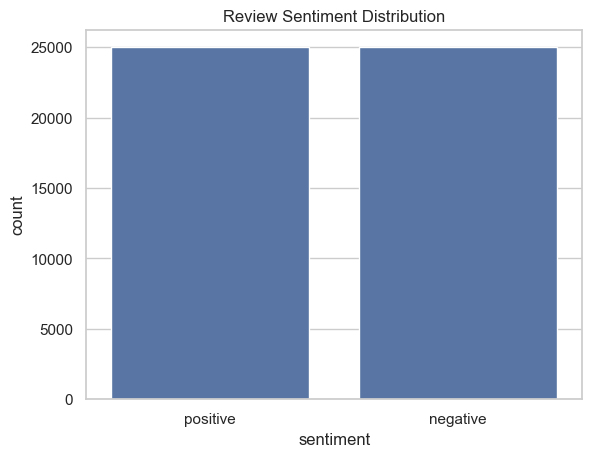


Data After Preprocessing:
                                              review  \
0  One of the other reviewers has mentioned that ...   
1  A wonderful little production. <br /><br />The...   
2  I thought this was a wonderful way to spend ti...   
3  Basically there's a family where a little boy ...   
4  Petter Mattei's "Love in the Time of Money" is...   

                                      cleaned_review  
0  one reviewers mentioned watching oz episode yo...  
1  wonderful little production br br filming tech...  
2  thought wonderful way spend time hot summer we...  
3  basically theres family little boy jake thinks...  
4  petter matteis love time money visually stunni...  


In [2]:
# --- 2. EDA AND TEXT PREPROCESSING ---

# Check sentiment distribution
print("\nSentiment Distribution:")
print(df['sentiment'].value_counts())

# Plot sentiment distribution
sns.countplot(x='sentiment', data=df)
plt.title('Review Sentiment Distribution')
plt.show()

# Function to clean text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove characters other than letters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove stopwords
    stop_words = set(stopwords.words('english')) # Change to 'indonesian' if necessary
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

# Applying the preprocessing function to the 'review' column
df['cleaned_review'] = df['review'].apply(preprocess_text)

print("\nData After Preprocessing:")
print(df[['review', 'cleaned_review']].head())

In [3]:
# --- 3. FEATURE ENGINEERING (TF-IDF) ---

# Initialize the TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)

# Separating features (X) and target (y)
X = df['cleaned_review']
y = df['sentiment']

# Transforming text into TF-IDF vectors
X_tfidf = tfidf.fit_transform(X)

print("\nShape of the TF-IDF Matrix:")
print(X_tfidf.shape)


Shape of the TF-IDF Matrix:
(50000, 5000)


In [4]:
# --- 4. MODEL TRAINING ---

# Splitting the data into training data (80%) and testing data (20%)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the Naive Bayes model
model = MultinomialNB()

# Training the model with the training data
model.fit(X_train, y_train)

print("\nNaive Bayes model trained successfully!")


Naive Bayes model trained successfully!



Model Accuracy: 0.8542

Classification Report:
              precision    recall  f1-score   support

    negative       0.86      0.85      0.85      5000
    positive       0.85      0.86      0.86      5000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000


Confusion Matrix:


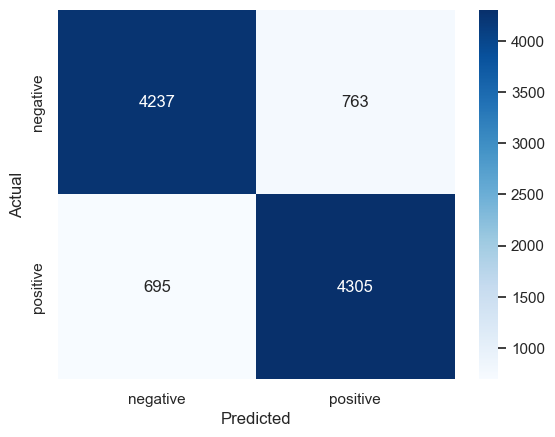

In [5]:
# --- 5. MODEL EVALUATION ---

# Making predictions on the test data
y_pred = model.predict(X_test)

# Calculating the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f}")

# Displaying the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Displaying the confusion matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [6]:
import joblib
import os

# Define the destination directory
output_dir = '../models'

# Create the directory if it does not exist
# exist_ok=True means no error will be raised if the folder already exists
os.makedirs(output_dir, exist_ok=True)

# Define the full paths for the model and the vectorizer
model_path = os.path.join(output_dir, 'sentiment_model.joblib')
vectorizer_path = os.path.join(output_dir, 'tfidf_vectorizer.joblib')

# --- SAVING ---
# Save the model
joblib.dump(model, model_path)

# Save the vectorizer (don't forget!)
joblib.dump(tfidf, vectorizer_path)

print(f"Model successfully saved at: {model_path}")
print(f"Vectorizer successfully saved at: {vectorizer_path}")

Model successfully saved at: ../models\sentiment_model.joblib
Vectorizer successfully saved at: ../models\tfidf_vectorizer.joblib
